# Grid run

> Explore hyperparameter spaces with 2D heatmap visualizations

In [ ]:
#| default_exp gridrun

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import pylab as plt
from functools import partial

In [ ]:
#| export
def grid_run(fun, **kwargs):
    (k1, v1s), (k2, v2s) = kwargs.items()
    results = np.zeros((len(v1s), len(v2s)))
    for i in range(5):
        fun(**{k1:v1s[0], k2:v2s[0]})
    for i1, v1 in enumerate(v1s):
        for i2, v2 in enumerate(v2s):
            results[i1, i2] = fun(**{k1:v1, k2:v2})
    return dict(
        k1=k1, v1s=v1s,
        k2=k2, v2s=v2s,
        results=results,
    )

In [ ]:
#| export
def grid_show(r, figsize=(6,6), colorfun=np.log, textfun=lambda x: x):
    plt.figure(figsize=figsize)
    plt.imshow(colorfun(r['results']), cmap='Blues')
    ax = plt.gca()
    v1s, v2s = r['v1s'], r['v2s']
    yticks, xticks = range(len(v1s)), range(len(v2s))
    ax.set_xlabel(r['k2'])
    ax.set_xticks(xticks)
    ax.set_xticklabels(v2s)
    ax.set_ylabel(r['k1'])
    ax.set_yticks(yticks)
    ax.set_yticklabels(v1s)
    for y in yticks:
        for x in xticks:
            plt.text(x, y, f"{textfun(r['results'][y,x]):.2f}", ha="center", va="bottom")

In [ ]:
r = grid_run(lambda localx, localy: localx * localy, localx = [1,2,3], localy=[2,3,4])
r['results']

array([[ 2.,  3.,  4.],
       [ 4.,  6.,  8.],
       [ 6.,  9., 12.]])

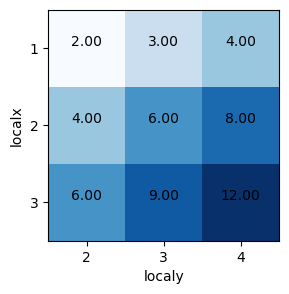

In [ ]:
grid_show(r, figsize=(3,3))

To highlight the highest numbers use `colorfun`.

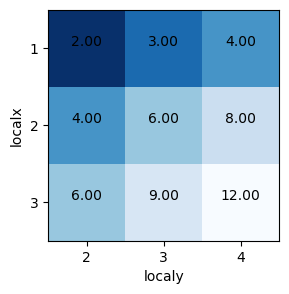

In [ ]:
grid_show(r, figsize=(3,3), colorfun=lambda x: -np.log(x))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()